In [1]:
import yfinance as yf
import pandas as pd

# Download data
df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()


/tmp/ipython-input-1-1990291838.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,71.627100,72.681296,71.373226,72.620850,135480400
2020-01-03,71.847110,72.676439,71.689950,71.914810,146322800
2020-01-06,71.034717,72.526541,70.783256,72.487854,118387200
2020-01-07,72.497522,72.753816,71.926907,72.146935,108872000
2020-01-08,71.849533,73.609745,71.849533,73.307510,132079200


In [2]:
# Label: 1 if next day Close > today's Close, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Features
df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()

df.dropna(inplace=True)

features = ['Open-Close', 'High-Low', 'MA5', 'MA10', 'Volume']
X = df[features]
y = df['Target']


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


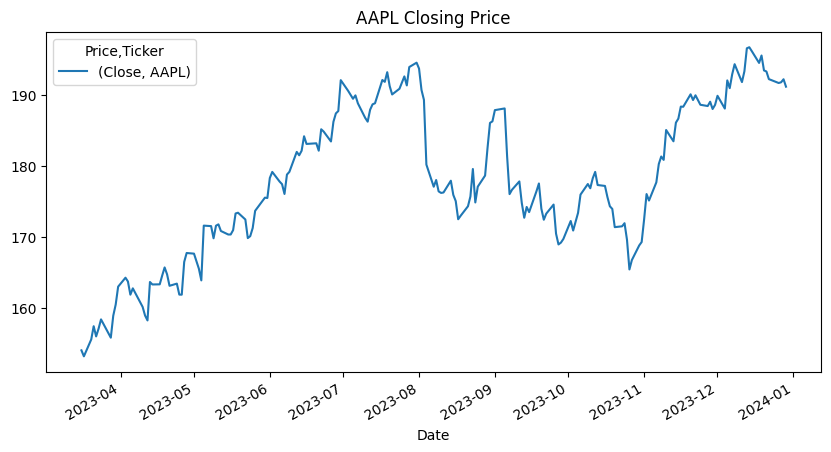

Price            Close Target Predicted
Ticker            AAPL                 
Date                                   
2023-03-16  154.091919      0         1
2023-03-17  153.251511      1         0
2023-03-20  155.624420      1         0
2023-03-21  157.483231      0         0
2023-03-22  156.049591      1         1


In [5]:
import matplotlib.pyplot as plt

# Use the index of y_test to select the corresponding rows from the original df
df_test = df.loc[y_test.index]
df_test['Predicted'] = y_pred
df_test[['Close']].plot(figsize=(10, 5))
plt.title("AAPL Closing Price")
plt.show()

# Print first few predictions
print(df_test[['Close', 'Target', 'Predicted']].head())